In [7]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import math

T = 1.0

def true_S_t(t: float):
    if 0.5 <= t:
        return 110.0
    else:
        return 100.0

def V_t(t: float):
    if 0.8 <= t:
        return 0.025
    elif 0.4 <= t <= 0.6:
        return 1.0
    else:
        return 0.2

def reversion_rate(t: float):
    if 0.8 <= t:
        return 30.0
    elif 0.5 <= t:
        return V_t(t) * (5.0 + 30 * t)
    else:
        return V_t(t) * 5.0

def dS_t_1(t: float, dt: float, S_t: float, rng: np.random.Generator):
    return reversion_rate(t) * (true_S_t(t) - S_t) * dt + math.sqrt(V_t(t)) * S_t * rng.normal(loc=0.0, scale=1.0) * dt
    
def dS_t_2(t: float, dt: float, S_t: float, rng: np.random.Generator):
    return reversion_rate(t) * (true_S_t(t) - S_t) * dt + V_t(t) * math.sqrt(S_t * dt) * rng.normal(loc=0.0, scale=1.0)

def generate_stock_path_2(N: int, rng: np.random.Generator):
    dt = T / N
    ts = np.linspace(0.0, T, N + 1, dtype=np.float64)
    path = np.zeros(shape=(N + 1), dtype=np.float64)
    path[0] = true_S_t(ts[0])
    for i in range(N):
        t = ts[i + 1]
        path[i + 1] = path[i] + dS_t_2(t, dt, path[i], rng)
    return ts, path

def compute_volatility(ts: npt.NDArray[np.float64], path: npt.NDArray[np.float64], window=10):
    volatilities = np.zeros_like(path)
    
    for i in range(len(path)):
        if i < window:
            volatilities[i] = np.std(path[:i+1])  # Use available data for early points
        else:
            volatilities[i] = np.std(path[i-window:i])  # Rolling window standard deviation
            
    return ts, volatilities

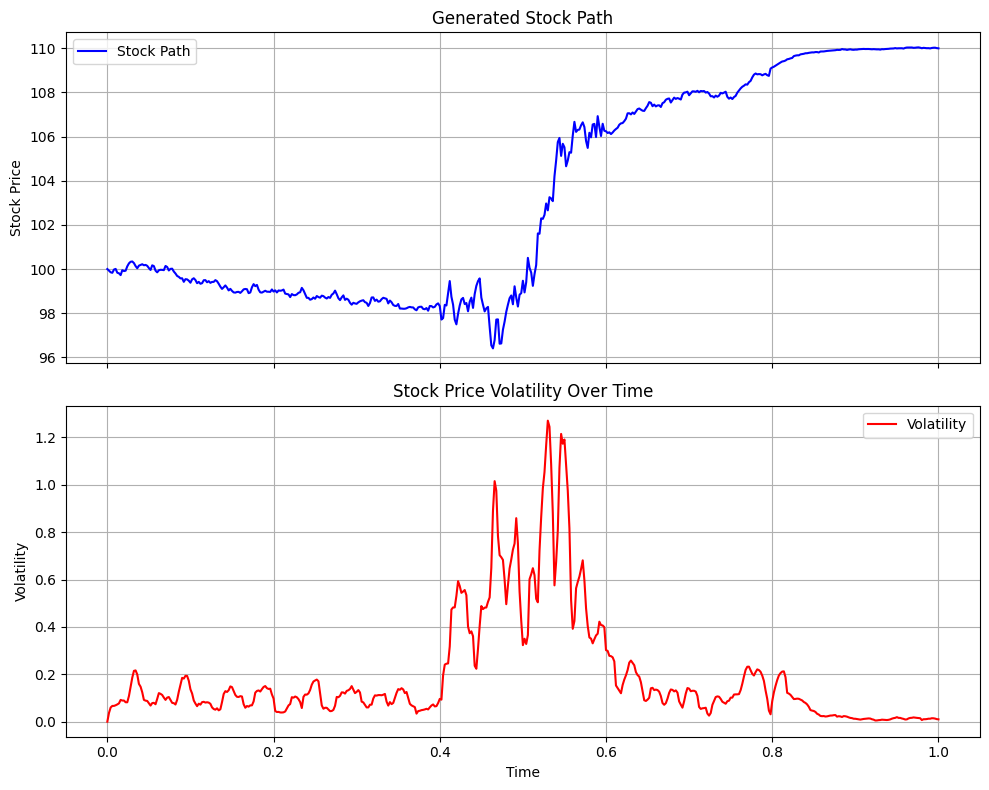

In [8]:
rng = np.random.default_rng()
N = 500

# Generate and plot the stock path
times, stock_path = generate_stock_path_2(N, rng)
times_vol, volatility = compute_volatility(times, stock_path)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot stock path in the first subplot
axes[0].plot(times, stock_path, label="Stock Path", color="blue")
axes[0].set_ylabel("Stock Price")
axes[0].set_title("Generated Stock Path")
axes[0].legend()
axes[0].grid(True)

# Plot volatility in the second subplot
axes[1].plot(times_vol, volatility, label="Volatility", color="red")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Volatility")
axes[1].set_title("Stock Price Volatility Over Time")
axes[1].legend()
axes[1].grid(True)

# Adjust layout for better readability
plt.tight_layout()
plt.show()